**Task no.2 solution** 

Konstantin Gavaza, J41332c

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def function2d(x, y):
    return 3 * x ** 2 + x * y + 2 * y ** 2 - x - 4 * y

In [3]:
def grad_function2d(data):
    # gradient of the 2d function: 3 * x ** 2 + x * y + 2 * y ** 2 - x - 4 * y
    (x, y) = data
    
    return np.array([6 * x + y - 1, 4 * y + x - 4])

In [4]:
def SGD2d(gradient2d, start, learn_rate = 0.2, n_iter=50, tolerance=1e-06): 
    #Stochastic Gradient Descent
    '''
    gradient2d - gradient of the 2d function
    start - starting point
    learn_rate - learning rate
    n_iter - number of iterations
    tolerance - tolerance
    '''
    
    np.random.seed(1234)
    x = start
    x_seq, y_seq = x[0], x[1]
    
    for _ in range(n_iter):
        cur_comp = np.random.randint(2)
        delta = -learn_rate * grad_function2d(x)[cur_comp]
        
        if np.abs(delta) <= tolerance:
            break
            
        x[cur_comp] += delta
        x_seq, y_seq = np.append(x_seq, x[0]), np.append(y_seq, x[1]) 
        
    return x, x_seq, y_seq

In [5]:
def Adam(gradient2d, start, learn_rate = 0.2, beta_1 = 0.9, beta_2 = 0.99, n_iter=500, eps = 1e-8, tolerance=1e-06):
    #Adam optimizer
    '''
    gradient2d - gradient of the 2d function
    start - starting point
    learn_rate - learning rate
    beta_1 - rate of decay of the first moment
    beta_2 - rate of decay of the second moment
    n_iter - number of iterations
    eps - small noise
    tolerance - tolerance
    '''
    
    x = start
    x_seq, y_seq = x[0], x[1]
    m, v, t = 0, 0, 0

    for t in range(1, n_iter + 1): 
        
        g = gradient2d(x)
        m = beta_1 * m + (1 - beta_1) * g
        v = beta_2 * v + (1 - beta_2) * (g ** 2)
        m_est = m / (1 - beta_1 ** t) 
        v_est = v / (1 - beta_2 ** t) 
        
        delta = -learn_rate * m_est / (v_est ** 0.5 + eps)
        
        if np.all(np.abs(delta) <= tolerance):
            break
            
        x += delta
        x_seq, y_seq = np.append(x_seq, x[0]), np.append(y_seq, x[1]) 
        
    return x, x_seq, y_seq

In [6]:
def contour_plot(x_seq,y_seq):
    from matplotlib import cm
    
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    
    plt.plot(x_seq,y_seq,'ro')
    plt.plot(x_seq[-1],y_seq[-1],'+')

In [7]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Z = function2d(X,Y)

In [8]:
res_sgd = SGD2d(grad_function2d, [0, 0])
print('Min arg:', res_sgd[0])

Min arg: [1.7322352889048127e-05, 0.999897095241728]


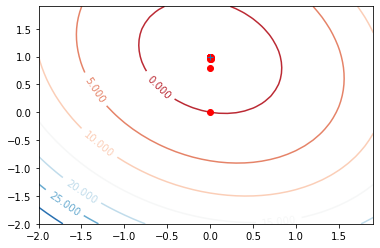

In [9]:
contour_plot(res_sgd[1], res_sgd[2])

In [10]:
res_adam = Adam(grad_function2d, [0, 0])
print('Min arg:', res_adam[0])

Min arg: [-2.37648488e-06  1.00000588e+00]


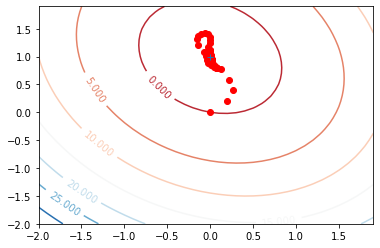

In [11]:
contour_plot(res_adam[1], res_adam[2])